In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

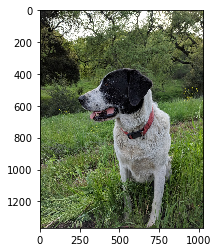

In [4]:
plt.imshow(full)

In [5]:
face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

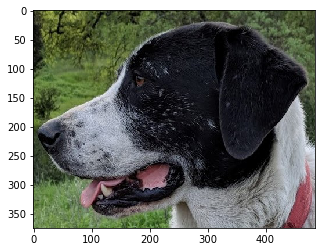

In [6]:
plt.imshow(face)

In [7]:
full.shape

(1367, 1025, 3)

In [8]:
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

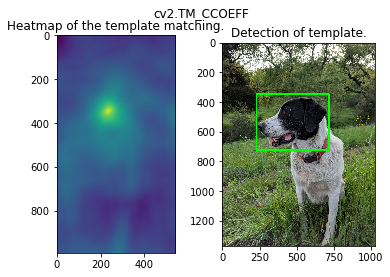

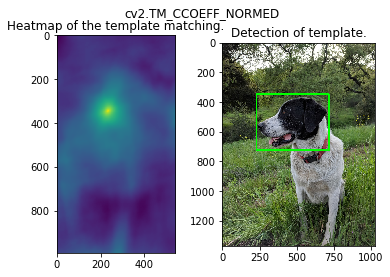

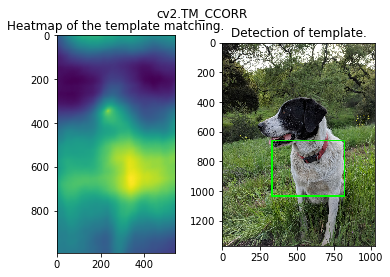

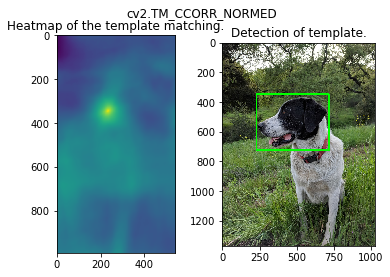

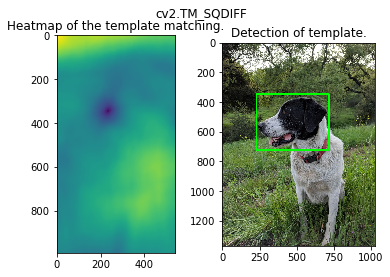

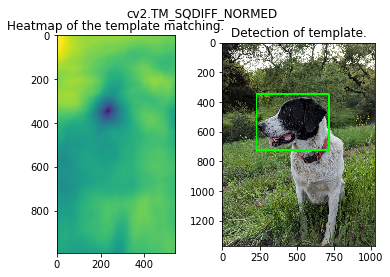

In [10]:
for m in methods:
    
    full_copy = full.copy()
    
    method = eval(m)
    
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else :
        top_left = max_loc
        
    height,width,channels = face.shape
    
    bottom_right = (top_left[0] + width,top_left[1] + height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(0,255,0),10)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of the template matching.')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template.')
    plt.suptitle(m)
    
    plt.show()
    
    print('\n\n')